In [196]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [197]:
Covid = pd.read_csv('corona_tested_006.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_6996\301144253.py:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  Covid = pd.read_csv('corona_tested_006.csv')


# perform Explatory data Analysis

In [198]:
#understand the information in dataset
Covid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [199]:
#we have to change data type of some of columns
Covid.head()
Covid.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


In [200]:
#understand the Shape of dataset
Covid.shape


(278848, 11)

In [201]:
#undertand how dataset looks mathematically
Covid.describe()


,Ind_ID
count,278848.000000
mean,139424.500000
std,80496.628269
min,1.000000
25%,69712.750000
50%,139424.500000
75%,209136.250000
max,278848.000000


In [202]:
#check Null values?
Covid.isnull().sum()
#no missing value present in the dataset

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [203]:
 #checking possibilities of outliers
Covid.describe(percentiles=[0.00,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90])
#in covid dataset only Ind_id is numerical column and that is not numumeric in nature so not need to check outliers

,Ind_ID
count,278848.000000
mean,139424.500000
std,80496.628269
min,1.000000
0%,1.000000
10%,27885.700000
20%,55770.400000
30%,83655.100000
40%,111539.800000
50%,139424.500000


In [204]:
#understand correlation between columns?
Covid.corr()
Covid.sample(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_6996\2679111306.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Covid.corr()


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
29835,29836,25-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,male,Other
30390,30391,25-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,male,Other
51695,51696,29-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,male,Abroad
113873,113874,07-04-2020,FALSE,FALSE,False,False,False,negative,No,female,Abroad
78923,78924,02-04-2020,FALSE,FALSE,False,False,False,positive,No,male,Other
174444,174445,17-04-2020,False,False,False,False,False,negative,None,female,Other
176036,176037,17-04-2020,False,False,False,False,False,negative,None,male,Other
181869,181870,18-04-2020,False,False,False,False,False,negative,None,male,Other
242854,242855,25-04-2020,False,False,False,False,False,negative,None,male,Other
112212,112213,07-04-2020,TRUE,FALSE,False,False,False,negative,No,male,Abroad


In [205]:
#convert test_date column into datetime data type
Covid['Test_date']=pd.to_datetime(Covid['Test_date'])


C:\Users\HP\AppData\Local\Temp\ipykernel_6996\1252089643.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Covid['Test_date']=pd.to_datetime(Covid['Test_date'])


In [206]:
#convert FALSE value with False in all the columns
Covid['Cough_symptoms'].replace('FALSE', 'False', inplace=True)
Covid['Fever'].replace('FALSE', 'False', inplace=True)
Covid['Sore_throat'].replace('FALSE', 'False', inplace=True)
Covid['Shortness_of_breath'].replace('FALSE', 'False', inplace=True)
Covid['Headache'].replace('FALSE', 'False', inplace=True)

In [207]:
#convert these columns Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache boolean datatype
Covid['Cough_symptoms'] = Covid['Cough_symptoms'].map({'True': True, 'False': False}).astype(bool)
Covid['Fever'] = Covid['Fever'].map({'True': True, 'False': False}).astype(bool)
Covid['Sore_throat']= Covid['Sore_throat'].map({'True': True, 'False': False}).astype(bool)
Covid['Shortness_of_breath'] = Covid['Shortness_of_breath'].map({'True': True, 'False': False}).astype(bool)
Covid['Headache'] = Covid['Headache'].map({'True': True, 'False': False}).astype(bool)

In [208]:
#check Duplicated in values in Dataset
Covid.duplicated()
#check sum of duplicated values in dataset
Covid.duplicated().sum()
#zero dupilicate value present in dataset

0

# Univariant Analysis

<Axes: ylabel='Known_contact'>

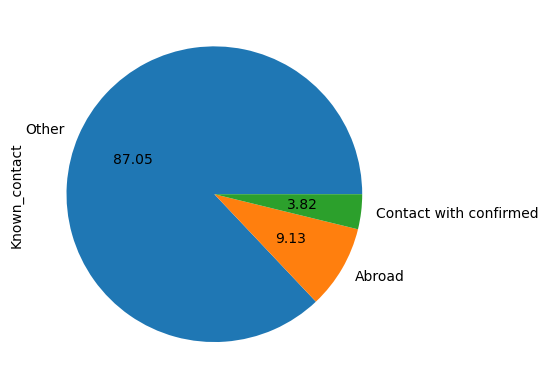

In [209]:
import seaborn as sns
Covid.columns
#PieChart
Covid['Known_contact'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='Sex'>

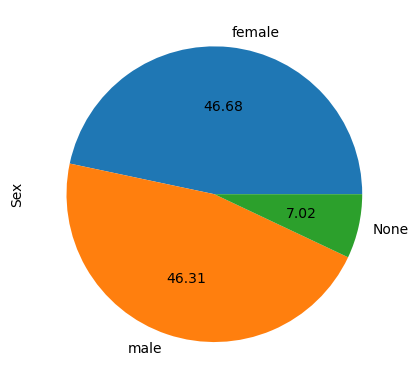

In [210]:
Covid['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='Age_60_above'>

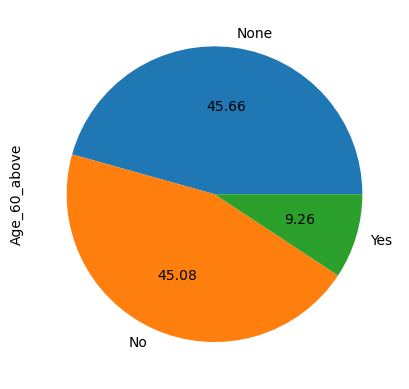

In [211]:
Covid['Age_60_above'].value_counts().plot(kind='pie',autopct='%.2f')

# Bivariant Analysis

<Axes: xlabel='Age_60_above', ylabel='Cough_symptoms'>

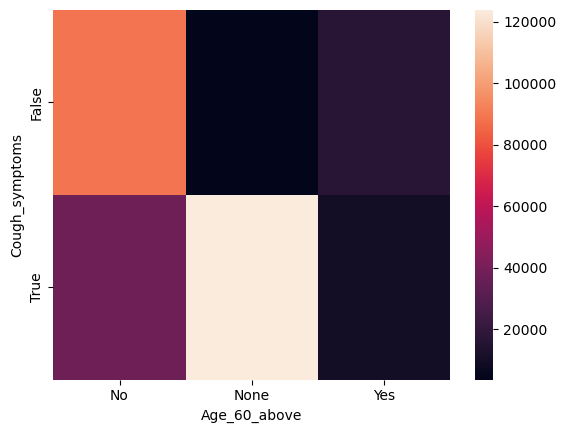

In [212]:
sns.heatmap(pd.crosstab(Covid['Cough_symptoms'],Covid['Age_60_above']))

<Axes: xlabel='Known_contact', ylabel='Cough_symptoms'>

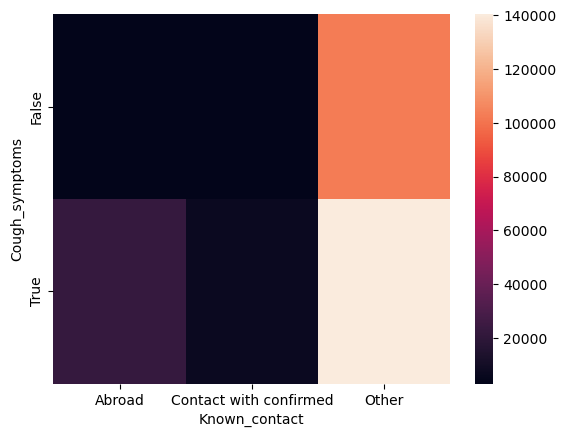

In [213]:
sns.heatmap(pd.crosstab(Covid['Cough_symptoms'],Covid['Known_contact']))

<Axes: xlabel='Known_contact', ylabel='Sex'>

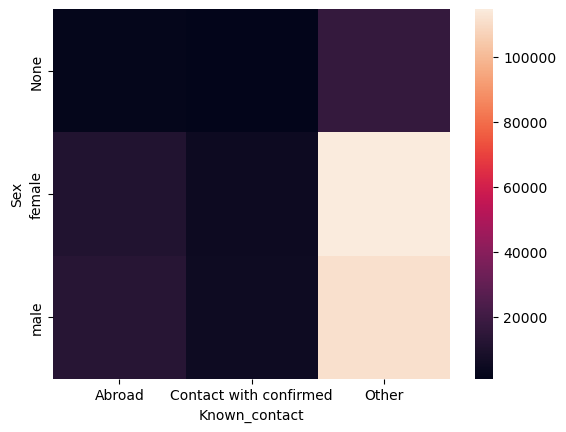

In [214]:
sns.heatmap(pd.crosstab(Covid['Sex'],Covid['Known_contact']))

<Axes: xlabel='Age_60_above', ylabel='Sex'>

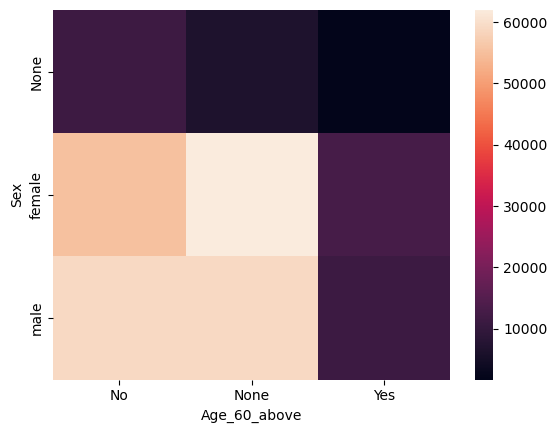

In [215]:
sns.heatmap(pd.crosstab(Covid['Sex'],Covid['Age_60_above']))

In [219]:
Covid.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-11-03,True,False,True,False,False,negative,None,None,Abroad
1,2,2020-11-03,False,True,False,False,False,positive,None,None,Abroad
2,3,2020-11-03,False,True,False,False,False,positive,None,None,Abroad
3,4,2020-11-03,True,False,False,False,False,negative,None,None,Abroad
4,5,2020-11-03,True,False,False,False,False,negative,None,None,Contact with confirmed


In [222]:
Covid.to_csv('Covid_clean_data1.csv', index=False)

In [194]:
#select main column which will effect ML model and accuracy
Covid=Covid[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Known_contact','Corona']]
Covid['Cough_symptoms'].value_counts()

True     170011
False    108837
Name: Cough_symptoms, dtype: int64

In [126]:
Covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Cough_symptoms       278848 non-null  bool  
 1   Fever                278848 non-null  bool  
 2   Sore_throat          278848 non-null  bool  
 3   Shortness_of_breath  278848 non-null  bool  
 4   Headache             278848 non-null  bool  
 5   Age_60_above         278848 non-null  object
 6   Known_contact        278848 non-null  object
 7   Corona               278848 non-null  object
dtypes: bool(5), object(3)
memory usage: 7.7+ MB


# Two column Known_contact and Age_60_above are in string categorical column so we have to encode them by using OneHotEncoding

In [127]:
Covid['Known_contact'].unique()

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [128]:
Covid['Age_60_above'].unique()

array(['None', 'No', 'Yes'], dtype=object)

In [129]:
Covid = pd.get_dummies(Covid, columns=['Known_contact'])

In [130]:
Covid = pd.get_dummies(Covid, columns=['Age_60_above'])

In [131]:
Covid.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact_Abroad,Known_contact_Contact with confirmed,Known_contact_Other,Age_60_above_No,Age_60_above_None,Age_60_above_Yes
0,True,False,True,False,False,negative,1,0,0,0,1,0
1,False,True,False,False,False,positive,1,0,0,0,1,0
2,False,True,False,False,False,positive,1,0,0,0,1,0
3,True,False,False,False,False,negative,1,0,0,0,1,0
4,True,False,False,False,False,negative,0,1,0,0,1,0


# Corona column is output column so we have to delete from the dataset

In [132]:
X=Covid.drop(columns=['Corona'])
Y=Covid['Corona']


# Test and Split the data

In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [134]:
print(X_train.shape)

(223078, 11)


In [135]:
print(X_test.shape)

(55770, 11)


In [136]:
X_train.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Known_contact_Abroad,Known_contact_Contact with confirmed,Known_contact_Other,Age_60_above_No,Age_60_above_None,Age_60_above_Yes
95011,False,False,True,True,True,0,0,1,1,0,0
149262,True,True,True,True,True,0,0,1,1,0,0
170331,True,True,True,True,True,0,0,1,0,1,0
21499,False,False,False,False,False,0,0,1,1,0,0
234876,True,True,True,True,True,0,0,1,0,1,0


# apply random forest alogrithm

In [137]:
Rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [138]:
Rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [140]:
y_pred = Rf.predict(X_test)

In [141]:
accuracy = accuracy_score(y_test, y_pred)

In [142]:
accuracy

0.9526447911063296